In [0]:
!pip install qiskit

## **Guide to this Notebook**
The problem statement is, we have to find a minimum eigen value of a given hamiltonian matrix. I have used Qiskit Aer backend here with Python.
This Notebook has 4 main sections. Please visit all the sections


1.   VQE using Scipy Optimizer
2.   Exploration of Energy Landscape
3.   VQE with Custom Optimizer
4.   Visualization of Results



In [0]:
#@title Default title text
##########################   Importing necessary Libraries  #####################
import numpy as np
from random import random
from scipy import array
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from qiskit import *
%matplotlib inline
plt.style.use('ggplot')

## **The given hamiltonian is here, we have to find the minimum energy eigen value using VQE**





In [3]:
H = np.array([[0,0,0,0],[0,-1,1,0],[0,1,-1,0],[0,0,0,0]])
print('find the minimum eigen value of\n',H)  # Problem Hamiltonian for the given question

find the minimum eigen value of
 [[ 0  0  0  0]
 [ 0 -1  1  0]
 [ 0  1 -1  0]
 [ 0  0  0  0]]


The above 2 qubit hamiltonial can be decomposed in 4 sub hamiltonian with the help of Pauli matrices(X,Y,Z) and I(Identity matrix).

#  ***H= aXX + bYY + cZZ + dII***

Where a,b,c,d are

*   a = 0.5
*   b = 0.5
*   c = 0.5
*   d = -0.5





In [0]:
## All the necessary functions for the algorithm is written here ##

def parametric_state(theta): #------------- Creates ANSATZ
    """
    Creates ANSATZ with an 
    angle taking as parameter &
    returns a quantum circuit.
    :param theta: angle in radian
    :return: quantum circuit
    """
    q = QuantumRegister(2)
    c = ClassicalRegister(2)
    circuit = QuantumCircuit(q,c)
    circuit.h(q[0])
    circuit.rz(theta,q[0])
    circuit.cx(0,q[1])
    circuit.x(q[1])
    return circuit


def XX(theta):
    """
    Gives expectation value of XX
    sub-hamiltonian from measurement
    on parametric state.
    :param theta: angle in radian
    :return: expectation value of XX
    """
    circuit = parametric_state(theta)
    ###########  Transformation on XX ###########
    q = circuit.qregs[0]
    c = circuit.cregs[0]
    circuit.ry(-np.pi/2, q[0])
    circuit.ry(-np.pi/2, q[1])
    circuit.measure(q,c)
    ############  XX measurement  ##############
    exp_XX = measurement(circuit)
    return exp_XX
    
def YY(theta):
    """
    Gives expectation value of YY
    sub-hamiltonian from measurement
    on parametric state.
    :param theta: angle in radian
    :return: expectation value of YY
    """
    circuit = parametric_state(theta)
    ########### Transformation on YY #########
    q = circuit.qregs[0]
    c = circuit.cregs[0]
    circuit.rx(np.pi/2, q[0])
    circuit.rx(np.pi/2, q[1])
    circuit.measure(q,c)
    ############ YY Measurement ###########  
    exp_YY = measurement(circuit)
    return exp_YY

def ZZ(theta):
    """
    Gives expectation value of ZZ
    sub-hamiltonian from measurement
    on parametric state.
    :param theta: angle in radian
    :return: expectation value of ZZ
    """
    circuit = parametric_state(theta)
    ##########################################
    q = circuit.qregs[0]
    c = circuit.cregs[0]
    circuit.measure(q,c)
    ###########  ZZ measurement ###############  
    exp_ZZ = measurement(circuit)
    return exp_ZZ

def vqe(theta):    #------------------- creates ansatz measures and performs addition to get the eigen value
    """
    Contain the complete Hamiltonian
    :param theta: angle is radian
    :return: expectation value of whole hamiltonian
    """                                                           # H = aXX + bYY + cZZ + dII
    E = (0.5*XX(theta)) + (0.5*YY(theta)) + (0.5*ZZ(theta)) - 0.5  #Hamiltonian  with a,b,c,d
    return E

def key_check(my_dict: dict, my_key: str):
    """
    If key is missing returns 0
    otherwise the corresponding value.
    :param my_dict: the dictionary
    :param my_key: key (string)
    :return: 0 or value corresponding to key
    """
    response = 0
    if my_key in my_dict:
        response = my_dict[my_key]
    return response

    
def measurement(circuit):  # ------------------ Takes a quantum circuit and perform measurement
    """
    Takes the quantum circuit as
    input to perform measurement
    :param circuit: quantumm circuit
    :return: expectation value
    """
    shots =1024
    backend = BasicAer.get_backend('qasm_simulator')
    job = execute(circuit, backend, shots=shots)
    result = job.result()
    counts = result.get_counts()
    
    n00 = key_check(counts,'00')
    n01 = key_check(counts,'01')
    n10 = key_check(counts,'10')
    n11 = key_check(counts,'11')
    shots = n00 + n01 + n10 + n11
    expectation_value = ((n00+n11)-(n01+n10))/shots 
    return expectation_value

## **VQE using Scipy 'Nelder-Mead' Optimizer**
We could have used other Optimizers also like Powell, COBYLA etc.


In [5]:
###########  VQE by Scipy Optimizers  ##############
theta = 4
result = minimize(vqe, theta, method="Nelder-Mead")
print('Ground state energy from VQE is {}'.format(result.fun))

Ground state energy from VQE is -2.0


## **Exploring the Potential Valley**
In this section the Parametric angle is varied from 4 radian to 1 radian using loop to explore the the hamiltonian behaviour. Eigen value of the hamiltonian matrix for variuos parametric angle is calculated and stored in list (energies0). Then, the minimum of eigen values is extracted using 'min()' method. Finally parametric angle(x axis) and corresponding energy eigen value(y axis) is plotted in a graph uusing matplotlib.


#### **This is NOT optimizer. Optimizer code is written below**

Parametric angle is 4 and energy eigen value is -1.6201171875 

Parametric angle is 3.96 and energy eigen value is -1.6689453125 

Parametric angle is 3.92 and energy eigen value is -1.720703125 

Parametric angle is 3.881 and energy eigen value is -1.7451171875 

Parametric angle is 3.842 and energy eigen value is -1.744140625 

Parametric angle is 3.804 and energy eigen value is -1.7841796875 

Parametric angle is 3.766 and energy eigen value is -1.810546875 

Parametric angle is 3.728 and energy eigen value is -1.80859375 

Parametric angle is 3.691 and energy eigen value is -1.861328125 

Parametric angle is 3.654 and energy eigen value is -1.8720703125 

Parametric angle is 3.618 and energy eigen value is -1.8828125 

Parametric angle is 3.581 and energy eigen value is -1.912109375 

Parametric angle is 3.546 and energy eigen value is -1.919921875 

Parametric angle is 3.51 and energy eigen value is -1.935546875 

Parametric angle is 3.475 and energy eigen value is -1.943359375 



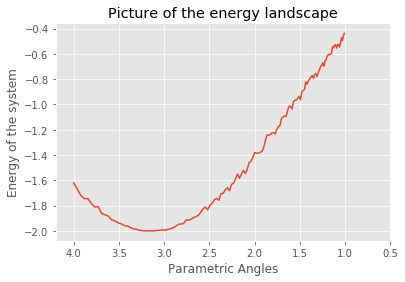

In [6]:
#################  Energy landscape exploration  ###############
theta = 4
angles0 = []        #--------------------------------- list for storing Parametric angles
energies0 = []      #--------------------------------- list for storing eigen values
while theta > 1:
    E = vqe(theta)
    angles0.append(theta)
    energies0.append(E)
    print('Parametric angle is {} and energy eigen value is {} \n'.format(round(theta,3),E))
    theta = theta * 0.99   #---------- Change of Paarametric angle in the WHILE Loop


print('\n \n \nMinimum energy eigen value is:',min(energies0))
plt.plot(angles0,energies0)
plt.title('Picture of the energy landscape', color='k')
plt.xlabel('Parametric Angles')
plt.xlim(4.2,0.5)
plt.ylabel('Energy of the system')
plt.show()

## **VQE using Custom Handmade Optimizer**
A very basic model of **Stocastic Gradient Descent** optimizer based on random number is written is this section. The basic steps of the algorithm are:


1.   A random choice of parametric angle is made around the initial guess theta.
2.   Value of the eigen value is calculated for that new parametric angle.
3.   If the eigen value for the new parametric angle is smaller than the eigen value corresponding to previous parametric angle, then new parametric angle is accepted.
4.   Otherwise another random choice is made around the old parametric angle. (STUCKED into that choice)
5.   If the solution is STUCKED there for 100 (if stuck >= 100) iterations, then evidently that must be the MINIMUM.

We could have used other search algorithm like Simulated annealing, Brute Force search etc.

Here also the parametric angles are stored in a list named **angles1** and energy eigen values corresponding to the parametric angles are stored is another list named **energies1**. Then a plot between parametric angles (x axis) and energy eigen value (y axis) is calculated, which shows the search of parametric angle to minimize the energy eigen value.



Parametric angle is 3.8787458438378 and energy eigen value is -1.744140625


Parametric angle is 3.7829761895461704 and energy eigen value is -1.810546875
STUCKED here for 1 iterations & minimum energy till now is-1.80859375
STUCKED here for 2 iterations & minimum energy till now is-1.7900390625
STUCKED here for 3 iterations & minimum energy till now is-1.755859375
STUCKED here for 4 iterations & minimum energy till now is-1.7978515625


Parametric angle is 3.664907016294858 and energy eigen value is -1.875


Parametric angle is 3.6511333268028197 and energy eigen value is -1.8798828125
STUCKED here for 1 iterations & minimum energy till now is-1.8623046875


Parametric angle is 3.624667455652673 and energy eigen value is -1.8720703125


Parametric angle is 3.5701066991397843 and energy eigen value is -1.908203125
STUCKED here for 1 iterations & minimum energy till now is-1.904296875


Parametric angle is 3.490762896552579 and energy eigen value is -1.9462890625
STUCKED here for 1 it

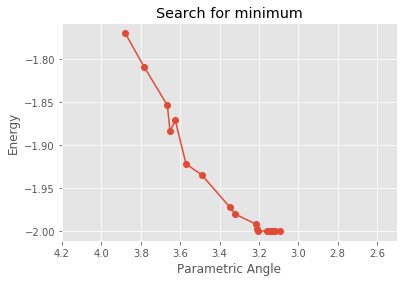

In [7]:
############################## New Approach to Optimization  ###############
theta = 4   #--------------------------------------- Initial Guess
theta_new = theta - np.random.random()      #------- A random choice around Guess

angles1 = []        #--------------------------------- list for storing Parametric angles
energies1 = []      #--------------------------------- list for storing energy values
stuck = 0
flag = True
while flag == True:
    if vqe(theta) > vqe(theta_new):
        print('\n\nParametric angle is {} and energy eigen value is {}'.format(theta_new,vqe(theta_new)))
        angles1.append(theta_new)
        energies1.append(vqe(theta_new))
        theta = theta_new
        theta_new = theta_new + np.random.randn()/10
        stuck = 0

    else:
        theta_new = theta + np.random.randn()/10
        stuck += 1
        print('STUCKED here for {} iterations & minimum energy till now is{}'.format(stuck,vqe(theta)))
        if stuck >= 100:
            print('\n\n-----Finally found the Minimum-----Minimum eigen value is',vqe(theta))
            flag = False

#print('\n \n \n minimum eigen value is',vqe(theta))
plt.plot(angles1,energies1,'o-')
plt.xlabel('Parametric Angle')
plt.ylabel('Energy')
plt.title('Search for minimum', color = 'k')
plt.xlim(4.2,2.5)
plt.show()

## **Visualization of Search Progress on Energy Landscape**
This section explains beautifully how the search algorithm explored the energy landscape to find the minimum eigen value using Variational Quantum Eigensolver (VQE) algorithm.


*   Left Figure: Whole Energy lanscape within theta = 4.2 to theta = 1
*   Right Figure: Zoomed within theta = 24.2 to theta= 2



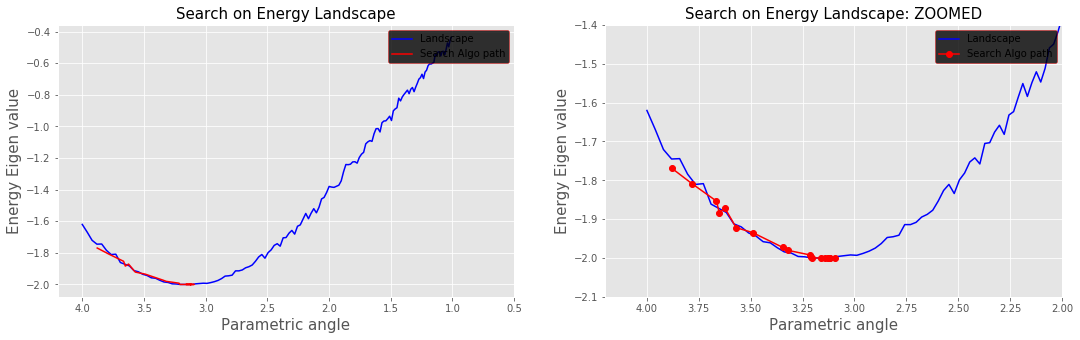

In [8]:
###################################  Visualization  ############################
f = plt.figure(figsize=(18,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(angles0,energies0,'b')
ax1.plot(angles1,energies1,'r')
ax1.set_xlim(4.2,0.5)
ax1.legend(['Landscape','Search Algo path'],loc="upper right",edgecolor='r',facecolor='k')
ax1.set_title('Search on Energy Landscape',size=15, color='k')
ax1.set_xlabel('Parametric angle',size=15)
ax1.set_ylabel('Energy Eigen value',size=15)
ax2.plot(angles0,energies0,'b')
ax2.plot(angles1,energies1,'o-r')
ax2.set_xlim(4.2,2)
ax2.set_ylim(-2.1,-1.4)
ax2.legend(['Landscape','Search Algo path'],loc="upper right",edgecolor='r',facecolor='k')
ax2.set_title('Search on Energy Landscape: ZOOMED',size=15, color='k')
ax2.set_xlabel('Parametric angle',size=15)
ax2.set_ylabel('Energy Eigen value',size=15)
plt.show()